In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('assets/july_all_day.xlsx')
df.head()

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.replace('-', 0, regex=True)
df.head()


In [9]:
df.isnull().any()

ID           False
WMO_CODE     False
NAME_EN      False
Region       False
Latitude     False
Longitude    False
00Z          False
01Z          False
02Z          False
03Z          False
04Z          False
05Z          False
06Z          False
07Z          False
08Z          False
09Z          False
10Z          False
11Z          False
12Z          False
13Z          False
14Z          False
15Z          False
16Z          False
17Z          False
18Z          False
19Z          False
20Z          False
21Z          False
22Z          False
23Z          False
sum          False
day          False
month        False
year         False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3813 non-null   int64  
 1   WMO_CODE   3813 non-null   int64  
 2   NAME_EN    3813 non-null   object 
 3   Region     3813 non-null   object 
 4   Latitude   3813 non-null   float64
 5   Longitude  3813 non-null   float64
 6   00Z        3813 non-null   object 
 7   01Z        3813 non-null   object 
 8   02Z        3813 non-null   object 
 9   03Z        3813 non-null   object 
 10  04Z        3813 non-null   object 
 11  05Z        3813 non-null   object 
 12  06Z        3813 non-null   object 
 13  07Z        3813 non-null   object 
 14  08Z        3813 non-null   object 
 15  09Z        3813 non-null   object 
 16  10Z        3813 non-null   object 
 17  11Z        3813 non-null   object 
 18  12Z        3813 non-null   object 
 19  13Z        3813 non-null   object 
 20  14Z     

In [15]:
dfs = df.iloc[:, 6:30]
dfs = dfs.merge(df[['NAME_EN', 'sum']], left_index=True, right_index=True)
dfs.head()

,00Z,01Z,02Z,03Z,04Z,05Z,06Z,07Z,08Z,09Z,...,16Z,17Z,18Z,19Z,20Z,21Z,22Z,23Z,NAME_EN,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.190000057220459,0.5799999833106995,0,0,0,Mae Hong Son,1.7699999809265137
1,0.5600000023841858,0,0,0,0,0,0,0,0,0,...,0,0,0,4.71999979019165,0,0,0,0,Mae Sariang,5.279999732971191
2,5.090000152587891,0,0,0,0,0,0,0,0,0,...,0,0,0,0.27000001072883606,0,0,0,0,Chiang Rai,5.360000133514404
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.27000001072883606,1.399999976158142,1.409999966621399,0.05000000074505806,0,Chiang Rai (1),3.129999876022339
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3.309999942779541,3.380000114440918,2.2699999809265137,14.119999885559082,3.369999885559082,Phayao,26.450000762939453


In [156]:
d1 = dfs.loc[df['day'] == 1]
d1 = d1.reset_index()[['NAME_EN', 'sum']]


In [157]:
d1['sum'] = d1['sum'].astype(float)
display(d1['sum'].max())
display(d1['sum'].mean())

59.7599983215332

5.510894342318056

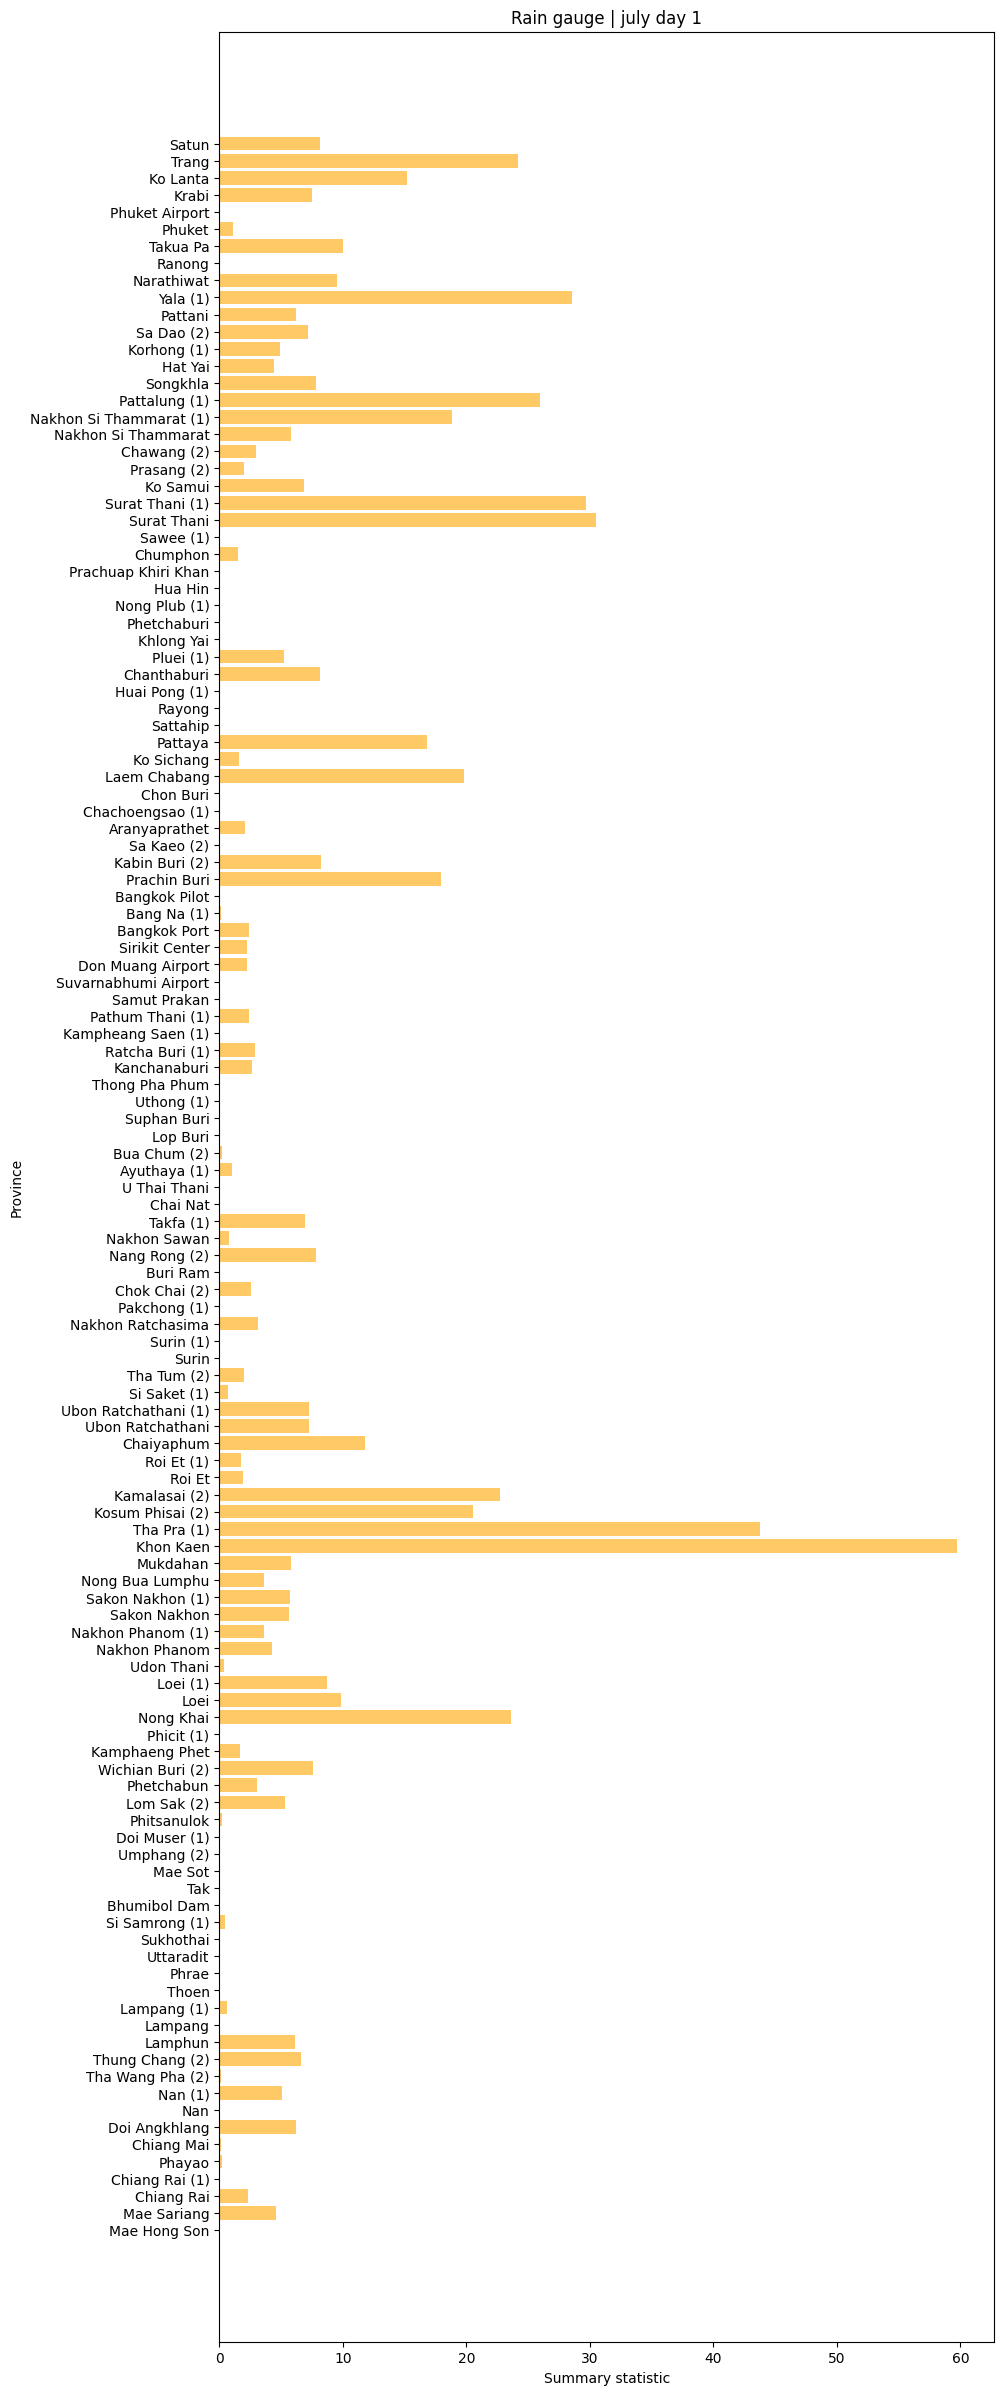

In [167]:
plt.rcdefaults()
fig = plt.figure(figsize=(10, 30))

name_en = tuple(d1['NAME_EN'])
y_pos = np.arange(len(name_en))

plt.barh(name_en, d1['sum'], align='center', alpha=.6, color='orange')
plt.yticks(y_pos, name_en)
plt.xlabel('Summary statistic')
plt.ylabel('Province')
plt.title('Rain gauge | july day 1')

plt.show()


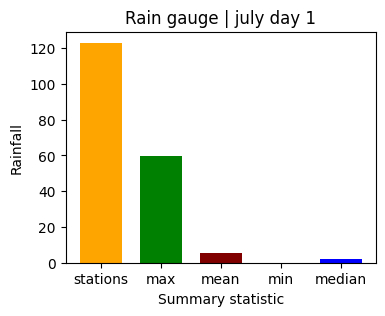

In [173]:
fig = plt.figure(figsize=(4, 3))
labels = ['stations', 'max', 'mean', 'min', 'median']
mat = d1['sum'].shape[0], d1['sum'].max(), d1['sum'].mean(), d1['sum'].min(), d1['sum'].median()

plt.bar(labels, mat, width=0.7, color=('orange', 'g', 'maroon', 'y', 'b'))
plt.xlabel('Summary statistic')
plt.ylabel('Rainfall')
plt.title('Rain gauge | july day 1')
# ax.bar(labels, mat, width=1, edgecolor="white", linewidth=5, color=('g', 'r', 'b'))
# ax.set_xlabel('RAIN GAUGE')
# ax.set_title('rain_gauge.ipynb')
plt.show()

In [178]:
df.head()

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,18Z,19Z,20Z,21Z,22Z,23Z,sum,day,month,year
0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,0,0,...,0,1.190000057220459,0.5799999833106995,0,0,0,1.770000,0,7,2020
1,2,325,Mae Sariang,Northern,18.166667,97.933333,0.5600000023841858,0,0,0,...,0,4.71999979019165,0,0,0,0,5.280000,0,7,2020
2,3,303,Chiang Rai,Northern,19.961389,99.881389,5.090000152587891,0,0,0,...,0,0.27000001072883606,0,0,0,0,5.360000,0,7,2020
3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0,0,0,...,0,0.27000001072883606,1.399999976158142,1.409999966621399,0.05000000074505806,0,3.130000,0,7,2020
4,5,310,Phayao,Northern,19.133333,99.900000,0,0,0,0,...,0,3.309999942779541,3.380000114440918,2.2699999809265137,14.119999885559082,3.369999885559082,26.450001,0,7,2020


In [182]:
def feature_plot(col: str = None) -> None:
    """
    count feature
    :param
        - col
    """
    sns.set_style('white')
    plt.figure()
    sns.countplot(df[col], alpha=1)
    plt.ylabel('# Amount')
    plt.title(f'Mushroom {col}')
    plt.xlabel(f'Type of {col}')
    plt.show()


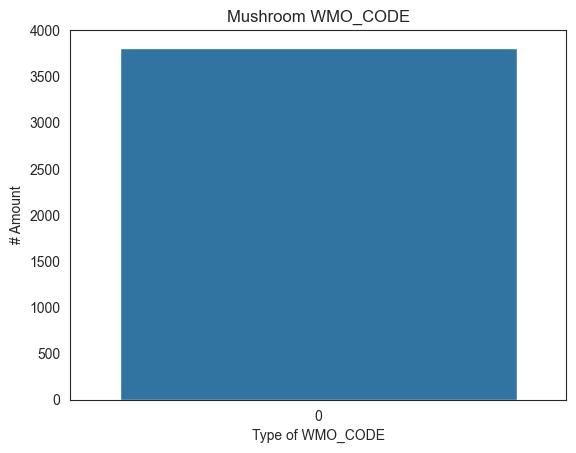

In [183]:
feature_plot('WMO_CODE')

In [1]:
def retrieve_data_and_clean(path: str):
    df = pd.read_excel(path)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(['SUM'], axis=1)
    df = df.replace('-', 0, regex=True)
    df['sum'] = df['sum'].replace(np.nan, 0)
    df = df.replace(np.nan, '')
    df.head()
    return df


IndentationError: expected an indented block (1031997463.py, line 1)